<a href="https://colab.research.google.com/github/beatriz-mattos/imersao-dados-alura/blob/main/analise_microdados_enem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#importar bibliotecas básicas para análise de dados
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importar dados do ENEM
source = "https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true"
data = pd.read_csv(source) #importa os dados compartilhados (modo CSV - Comma Separated Values) e disponibilida no código como DataFrame

#Exploração rápida dos dados
print("Shape =", data.shape) #dimensão dos dados [linhas, colunas]
data.head() #visualização rápida dos dados (5 primeiras linhas do Dataframe)

Shape = (127380, 136)


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,1,1506138.0,Redenção,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ACAEAAACABEBABAADCEEEDE*CBDCCCADADCCCBEBBBBDB,99999CCCABBCAADDBCEBCCADBEEBDECBAABDEACACAEABB...,DEEDCAECDDEEECBCBECABEBAECBBCDAECAEBBBBBDCCDB,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,60.0,100.0,80.0,80.0,100.0,420.0,B,B,A,A,4,B,A,C,B,A,C,B,A,A,A,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,1,1504208.0,Marabá,15.0,PA,1,3,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,ABBCEADCEBAAACACEDCDCDACCCACDCBCABCAACBDBDEDE,99999ABCEBCEDDECEEEBBCCEECCABDABEEBCDEAEBBEAEA...,NaN,1,NaN,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,NaN,1.0,80.0,100.0,80.0,80.0,60.0,400.0,C,C,A,A,4,B,A,B,C,A,A,B,B,B,A,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,1,1501402.0,Belém,15.0,PA,1,12,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CDCAACCAAADEACBBEBAAEECDABDEBAEAABEDCABABAABC,99999ECBCECEBBABECCCECECCEECCDECEEEDADDDDECEDD...,DDBEADEBBCADCEEACABECBCEBADECADCEDAACBDABABCE,1,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC,CBABADBBCEEEBCBADCBEEDBBEADBBACDBBACCCCADACAC,BBEDABDACACBABAECBBCCADCEBDBBCDDEEAAADDBECDECA...,EEEADBEBACABCDBABECECACDCBDCCEDCDABEDECDDDBAA,1.0,100.0,120.0,120.0,100.0,120.0,560.0,C,A,B,B,5,C,A,B,C,A,A,B,A,B,A,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,1,1505437.0,Ourilândia do Norte,15.0,PA,1,7,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,EECCCEDBADBEAAAAEBAECEAAAAEEEBACCAC*CEAEDAECE,99999BABCDABBCBDDAAECADBDDADDCBCEEDCAEBCEAEABD...,CBDEBBCBDEBCABCDBDEDADCCBEDBCAECEBEBDEBAEECBC,1,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,100.0,120.0,120.0,120.0,40.0,500.0,E,C,A,A,1,B,A,B,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,1,1500800.0,Ananindeua,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,...,CCBCBEACABACABBBBACCBCEBDCBABCADADCBCADBAADEA,EBCAB99999BBCECBCACBEACBDAABDBCBBDACEBBACDCAEC...,AECCBBCBBCBDEDECACBAABEDABBEDDADCEADDBEBDBBEB,0,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,160.0,140.0,160.0,160.0,160.0,780.0,E,E,B,D,3,E,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,D,A,A,B


In [10]:
data["SG_UF_RESIDENCIA"] #explorar APENAS uma coluna do DataFrame, por exemplo, a coluna de Estados no ENEM. Retorna todas as linhas do DataFrame para a coluna 'SG_UF_RESIDENCIA'

#O resultado de data['SG_UF_RESIDENCIA'] é diferente do resultado de data['SG_UF_RESIDENCIA'].head() => retorna apenas as 5 primeiras linhas para a coluna 'SG_UF_RESIDENCIA'

0         PA
1         PA
2         PA
3         PA
4         PA
          ..
127375    MG
127376    BA
127377    BA
127378    BA
127379    MG
Name: SG_UF_RESIDENCIA, Length: 127380, dtype: object

In [12]:
data.columns.values #Continuando a exploração dos dados, podemos averiguar quais são as 136 colunas do DataFrame

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [13]:
data[["SG_UF_RESIDENCIA", "NO_MUNICIPIO_RESIDENCIA"]] #caso queiramos verificar mais de 1 coluna, temos que inserir uma lista das colunas desejadas na busca do DataFrame

# * lista em python = []

,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA
0,PA,Redenção
1,PA,Marabá
2,PA,Belém
3,PA,São Félix do Xingu
4,PA,Ananindeua
...,...,...
127375,MG,Montalvânia
127376,BA,Barra da Estiva
127377,BA,Salvador
127378,BA,Simões Filho


In [18]:
data["SG_UF_RESIDENCIA"].unique() #para obter uma lista de todos os estados que têm pelo menos 1 participante na prova

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [19]:
len(data["SG_UF_RESIDENCIA"].unique()) #para facilitar a contagem, basta chamar a função len

27

In [21]:
#Agora sabemos que temos pelo menos 1 participante de cada UF. Mas quantos realmente temos no total por UF?

data["SG_UF_RESIDENCIA"].value_counts() #value_counts => cria uma tabela com os valores de participantes de cada UF

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

Text(0, 0.5, 'Participantes')

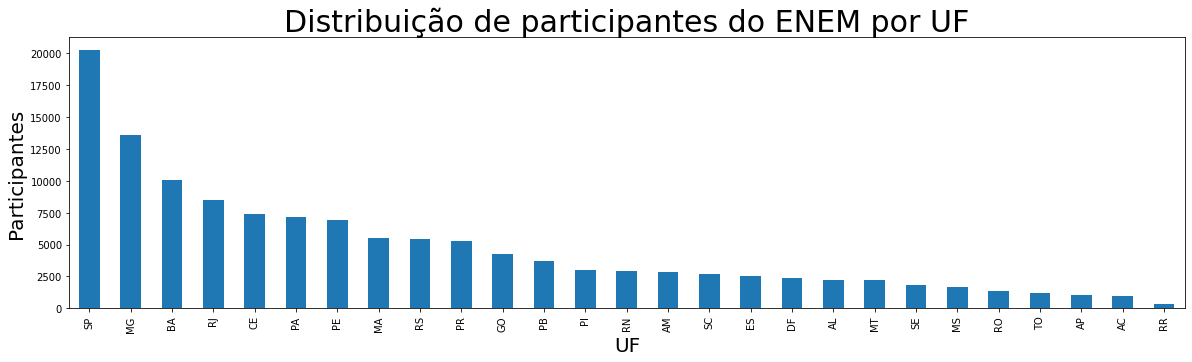

In [69]:
#Para ter melhor ideia dessa distribuição, melhor por no gráfico! Possibilidades: Usar o Matplotlib através do próprio Pandas ou usar outra biblioteca (Seaborn)

#Plotar gráfico com Pandas
data["SG_UF_RESIDENCIA"].value_counts().plot.bar(figsize=(20,5))

plt.title("Distribuição de participantes do ENEM por UF", fontsize=30) #título do gráfico

#Para deixar mais inteligível, pode-se nomear os eixos
plt.xlabel("UF", fontsize=20)
plt.ylabel("Participantes", fontsize=20)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Participantes')

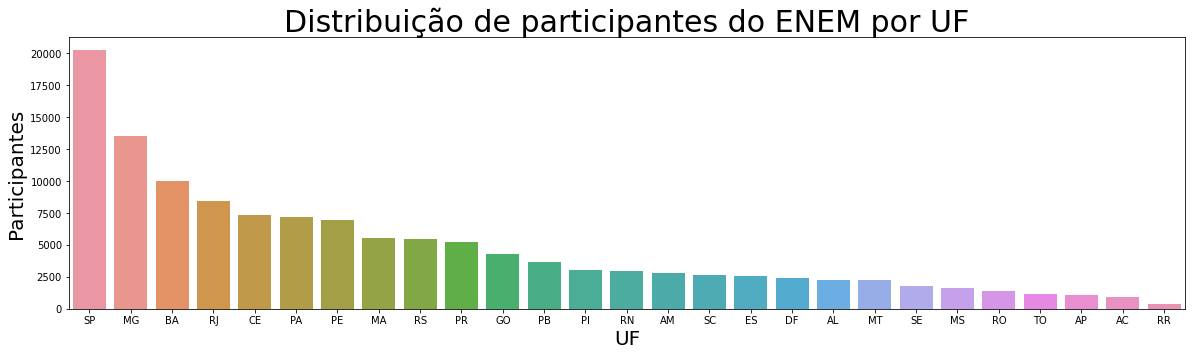

In [70]:
#Plotar dados com Seaborn
plt.figure(figsize=(20,5))
sns.barplot(data["SG_UF_RESIDENCIA"].value_counts().index,
data["SG_UF_RESIDENCIA"].value_counts().values)

plt.title("Distribuição de participantes do ENEM por UF", fontsize=30)
plt.xlabel("UF", fontsize=20)
plt.ylabel("Participantes", fontsize=20)

#Agora, é possível verificar que o maior número de participantes do ENEM nessa amostra é de SP

Text(0, 0.5, 'Participantes')

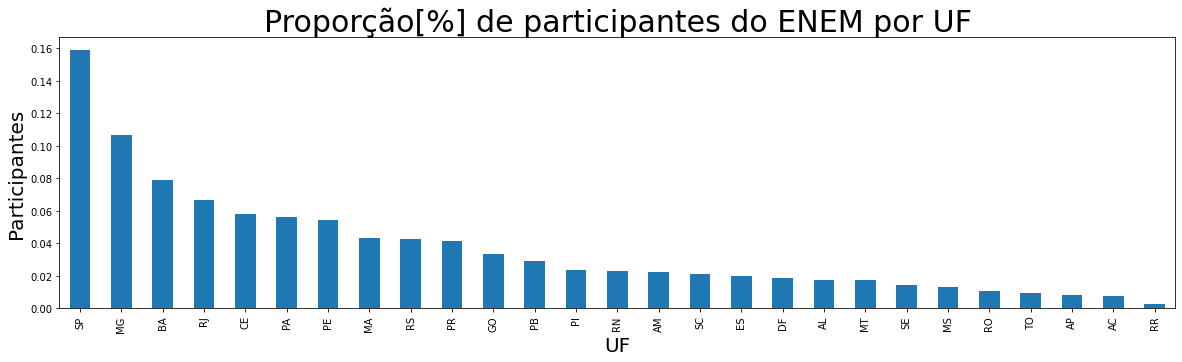

In [71]:
#Para saber a proporção de participantes do ENEM por UF do total de participantes:
data["SG_UF_RESIDENCIA"].value_counts(normalize=True).sort_values(ascending=False).plot.bar(figsize=(20,5))
plt.title("Proporção[%] de participantes do ENEM por UF", fontsize=30)
plt.xlabel("UF", fontsize=20)
plt.ylabel("Participantes", fontsize=20)

In [55]:
#Explorando a distribuição dos participantes por faixa etária
data["NU_IDADE"].value_counts() #cria uma tabela com os valores de idades dos participantes

#aqui os dados estão ordenados pela MAIOR QUANTIDADE de pessoas com a idade, e não pela idade!

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
75        2
73        2
82        1
77        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [56]:
#ordenando os dados pela idade:
data["NU_IDADE"].value_counts().sort_index()

13        4
14      141
15     2009
16     7830
17    21256
      ...  
73        2
75        2
76        1
77        1
82        1
Name: NU_IDADE, Length: 65, dtype: int64

Text(0, 0.5, 'Qte. de participantes')

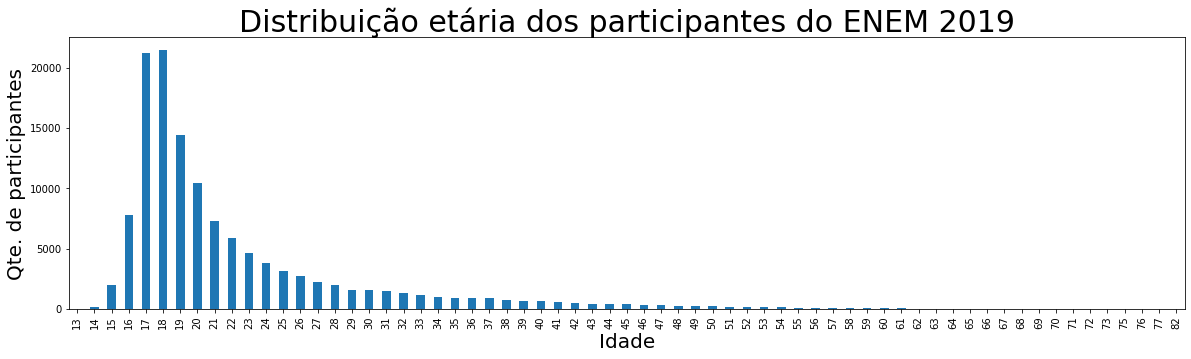

In [81]:
#Gráfico de barras
data["NU_IDADE"].value_counts().sort_index().plot.bar(figsize=(20,5))
plt.title("Distribuição etária dos participantes do ENEM 2019", fontsize=30)
plt.xlabel("Idade", fontsize=20)
plt.ylabel("Qte. de participantes", fontsize=20)

Text(0.5, 1.0, 'Distribuição etária dos participantes do ENEM 2019')

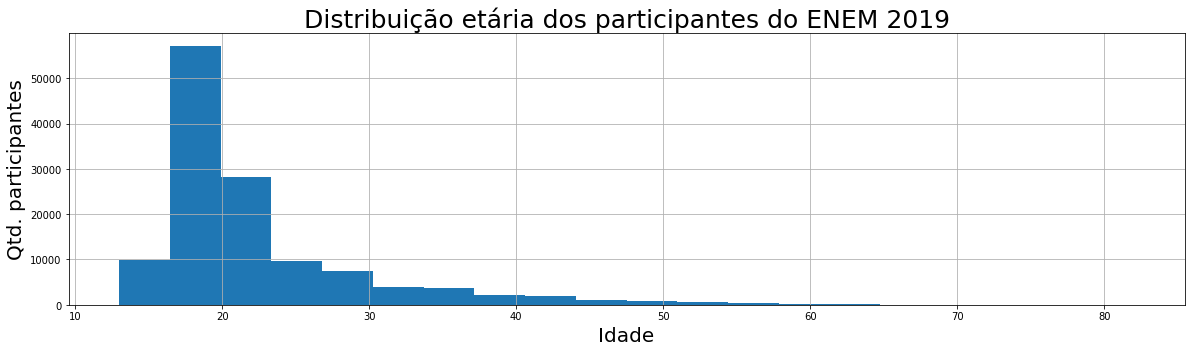

In [73]:
#Gráficos tipo Histograma => direto do Pandas + Matplotlib
plt.figure()
data["NU_IDADE"].hist(figsize=(20,5), bins=20) #bins são as colunas de divisão do histograma. Para que estes gráficos tenham a mesma distribuição, é preciso configurar esse parâmetro
plt.xlabel("Idade", fontsize=20)
plt.ylabel("Qtd. participantes", fontsize=20)
plt.title("Distribuição etária dos participantes do ENEM 2019", fontsize=25)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


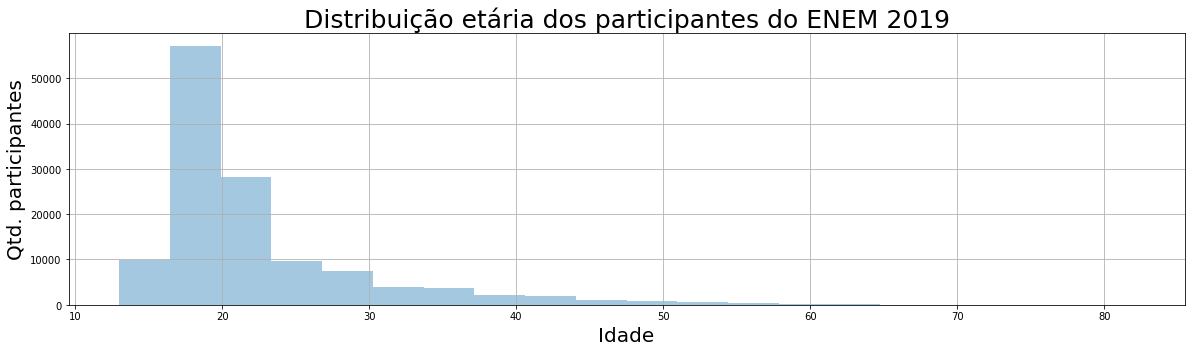

In [77]:
#Com Seaborn
plt.figure(figsize=(20,5))
sns.distplot(data["NU_IDADE"], kde=False, bins=20)
plt.xlabel("Idade", fontsize=20)
plt.ylabel("Qtd. participantes", fontsize=20)
plt.title("Distribuição etária dos participantes do ENEM 2019", fontsize=25)
plt.grid()

#Com estes gráficos, podemos concluir que a maior parte dos que prestam prova para o ENEM estão entre 16 e 25 anos.

In [100]:
#De quais estados são os inscritos com 13 anos?
data.query("NU_IDADE == 13")['SG_UF_RESIDENCIA'].unique()

array(['SP', 'MT', 'AP', 'BA'], dtype=object)

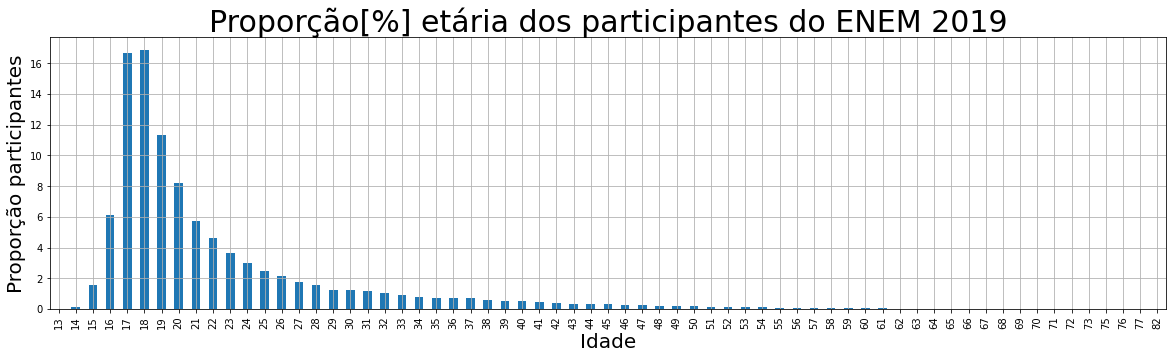

In [84]:
#Proporção etária:
prop_idade = data["NU_IDADE"].value_counts().sort_index()/data.shape[0]*100 #incluindo .shape para saber a proporção de cada idade dentro do total de participantes
prop_idade.plot.bar(figsize=(20,5))
plt.title("Proporção[%] etária dos participantes do ENEM 2019", fontsize=30)
plt.xlabel("Idade", fontsize=20)
plt.ylabel("Proporção participantes", fontsize=20)
plt.grid()

Text(0.5, 1.0, 'Distribuição etária dos participantes do Enem 2019')

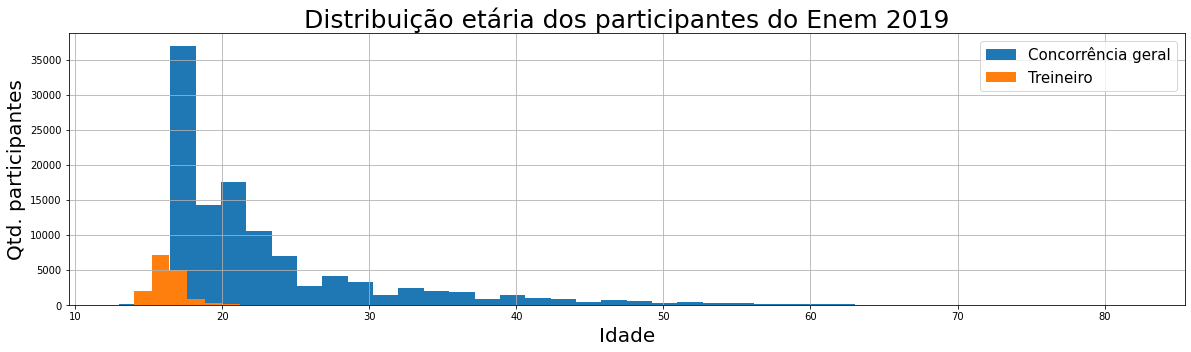

In [90]:
#Dentro do ENEM, existe uma categoria de participantes chamada Treineiro. Este realiza a prova como qualquer outro participante sem entrar no processo de seleção de vestibular, apenas para ganhar experiência e se preparar para os anos seguintes.
#Nos dados pode-se ver que existem participantes com idade inferior às que normalmente se espera para a prova (17 a 18 anos). Quantos desses participantes são ou não treineiros?

#treineiro => 1, não-treineiro => 0
treineiro = data.loc[data["IN_TREINEIRO"] == 1, "NU_IDADE"]
nao_treineiro = data.loc[data["IN_TREINEIRO"] == 0, "NU_IDADE"]

#Gráfico pandas + matplotlib
nao_treineiro.hist(bins=40, figsize=(20,5), label="Concorrência geral")
treineiro.hist(bins=40, figsize=(20,5), label="Treineiro")
plt.legend(fontsize=15)
plt.xlabel("Idade", fontsize=20)
plt.ylabel("Qtd. participantes", fontsize=20)
plt.title("Distribuição etária dos participantes do Enem 2019", fontsize=25)

#Conforme esperado, a maioria dos candidatos que prestam a prova como treineiros possuem menos de 20 anos.

Text(0.5, 1.0, 'Distribuição de notas de Linguagem e Comunicação')

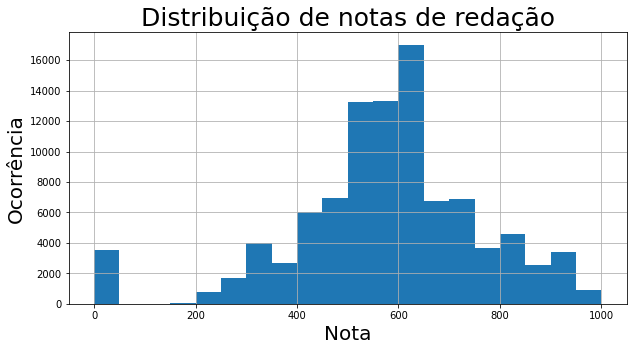

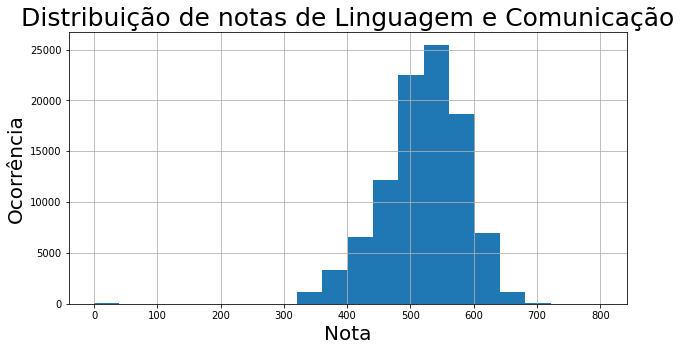

In [93]:
#Avaliar a distribuição das notas na prova de Redação + Linguagem e Comunicação

#Notas redação
plt.figure()
data["NU_NOTA_REDACAO"].hist(figsize=(10,5), bins=20)
plt.xlabel("Nota", fontsize=20)
plt.ylabel("Ocorrência", fontsize=20)
plt.title("Distribuição de notas de redação", fontsize=25)

plt.figure()
data["NU_NOTA_LC"].hist(figsize=(10,5), bins=20)
plt.xlabel("Nota", fontsize=20)
plt.ylabel("Ocorrência", fontsize=20)
plt.title("Distribuição de notas de Linguagem e Comunicação", fontsize=25)

#É interessante observar que a distribuição de notas na prova de redação é bem ampla quando comparada com a distribuição das notas de LC. Além disso, há uma maior ocorrência de participantes que zeraram a nota em redação.

In [95]:
#O Pandas permite que façamos uma exploração rápida dos dados e avaliemos dados como média, mediana e quartis
data["NU_NOTA_LC"].describe() #o comando describe retorna uma visão resumida dos dados

count    98043.000000
mean       520.463928
std         64.556578
min          0.000000
25%        483.700000
50%        526.100000
75%        565.100000
max        801.700000
Name: NU_NOTA_LC, dtype: float64

In [98]:
#A avaliação de um parâmetro isoladamente pode não fazer muito sentido quando usamos esse comando. Porém o Pandas permite que façamos comparações com variáveis.
provas = ["NU_NOTA_LC", "NU_NOTA_REDACAO"]
data[provas].describe()

,NU_NOTA_LC,NU_NOTA_REDACAO
count,98043.000000,98043.000000
mean,520.463928,571.570025
std,64.556578,188.076455
min,0.000000,0.000000
25%,483.700000,480.000000
50%,526.100000,580.000000
75%,565.100000,680.000000
max,801.700000,1000.000000


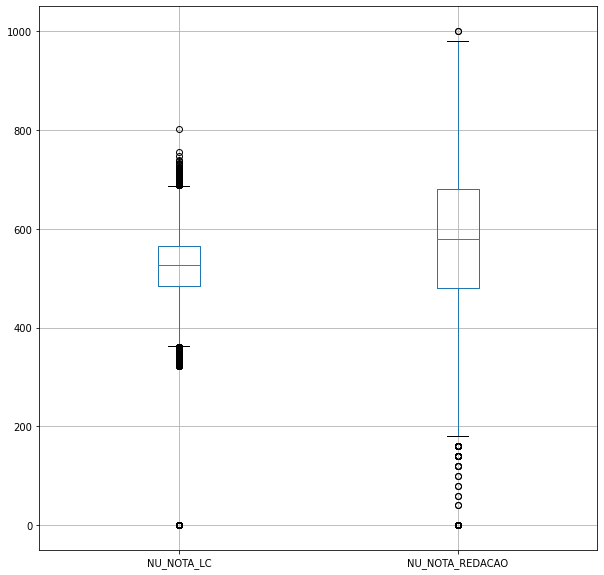

In [99]:
#a mesma comparação, mas de forma gráfica
provas = ["NU_NOTA_LC", "NU_NOTA_REDACAO"]
data[provas].plot.box(figsize=(10, 10), grid=True)

#É possível verificar o comportamento conforme descrito anteriormente, no qual a distribuição das notas encontra-se mais aberta para as notas de redação. Isso pode ser visto na região da caixa onde esta, que representa a região com maior concentração das notas é significativamente maior que a caixa das notas de LC.
#É possível também ter nesse gráfico de forma visual as informações de quartis (de baixo para cima: 25%, 50% e 75% ) na forma de traços no gráfico.